# Perbandingan Metode Random Forest vs Naive Bayes
Model yang mana yang lebih gacor diantara Random Forest & Naive Bayes dari segi evaluasi, akurasi, dan visualisasi data.
berdasarkan data `network_data.csv` wakwikwok.


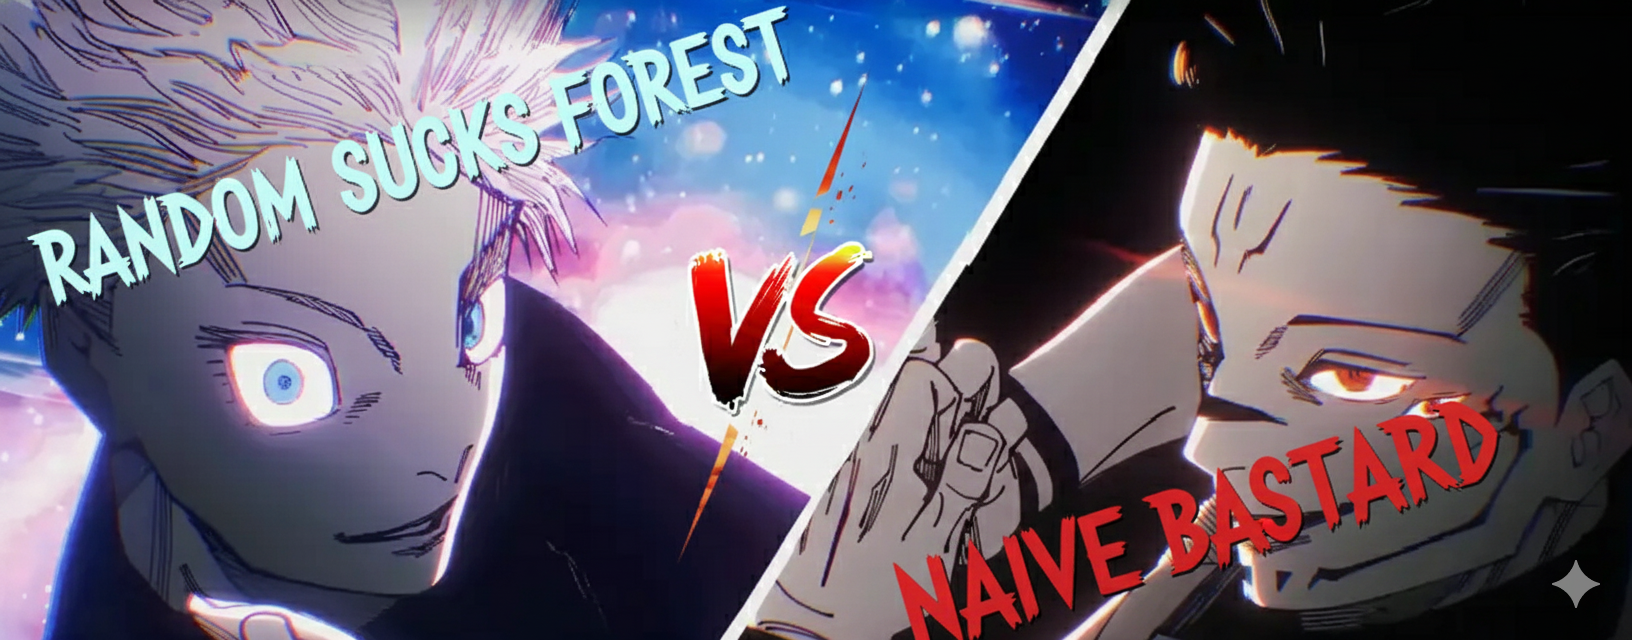

## Setup Library 

In [10]:
# cell 1 Data Ingestion [pengambilan dataset]

import os
import json
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    precision_recall_curve,
    auc
)

import joblib


## Memanggil dan Load hasil

In [11]:
# Cell 2: Setup folder project

# Menentukan folder kerja saat ini (notebook folder)
BASE_DIR = os.getcwd()

# Folder untuk output (grafik, model, dll)
STATIC_DIR = os.path.join(BASE_DIR, "static")
os.makedirs(STATIC_DIR, exist_ok=True)

print("BASE_DIR:", BASE_DIR)
print("STATIC_DIR:", STATIC_DIR)



BASE_DIR: c:\Users\lenovo\OneDrive\Desktop\Git Uploads\Prediksi-Machine-Learning\Supervised Learning
STATIC_DIR: c:\Users\lenovo\OneDrive\Desktop\Git Uploads\Prediksi-Machine-Learning\Supervised Learning\static


## Data Understanding & Pemanggilan Dataset

In [12]:
# Cell 3: Data Understanding

data_path = os.path.join(BASE_DIR, "network_data.csv")
df = pd.read_csv(data_path)

print("Data berhasil dibaca")
print("Ukuran dataset:", df.shape)

print("\n5 data pertama:")
display(df.head())

print("\nInfo dataset:")
df.info()



Data berhasil dibaca
Ukuran dataset: (20000, 5)

5 data pertama:


,bandwidth,latency,packet_loss,uptime,label
0,46.46,5.55,2.05,87.66,gangguan
1,52.88,283.24,5.70,94.23,normal
2,45.41,150.91,4.67,87.13,gangguan
3,105.70,86.39,3.95,94.27,normal
4,85.95,164.10,7.02,93.10,normal



Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bandwidth    20000 non-null  float64
 1   latency      20000 non-null  float64
 2   packet_loss  20000 non-null  float64
 3   uptime       20000 non-null  float64
 4   label        20000 non-null  object 
dtypes: float64(4), object(1)
memory usage: 781.4+ KB


## Membangun EDA


Distribusi Label:


label
normal      13719
gangguan     6281
Name: count, dtype: int64

label
normal      0.686
gangguan    0.314
Name: proportion, dtype: float64


Ringkasan statistik:


,bandwidth,latency,packet_loss,uptime
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,77.216948,153.117930,4.003394,92.468336
std,41.983675,85.141509,2.301103,4.338849
min,5.000000,5.020000,0.000000,85.000000
25%,41.167500,79.315000,2.050000,88.700000
50%,76.885000,153.345000,4.010000,92.480000
75%,113.282500,227.057500,5.990000,96.240000
max,149.990000,300.000000,8.000000,100.000000


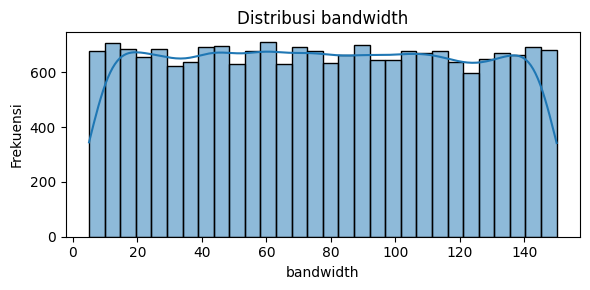

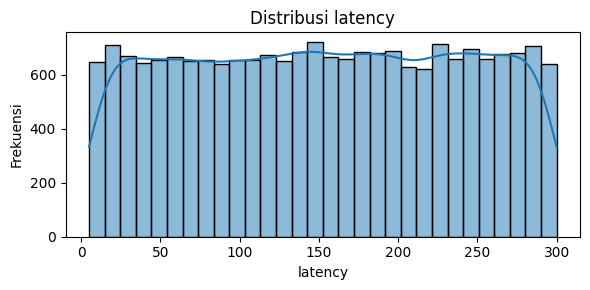

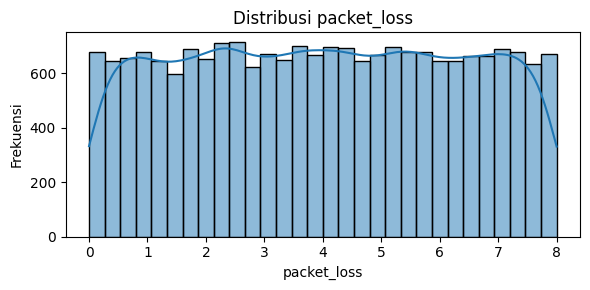

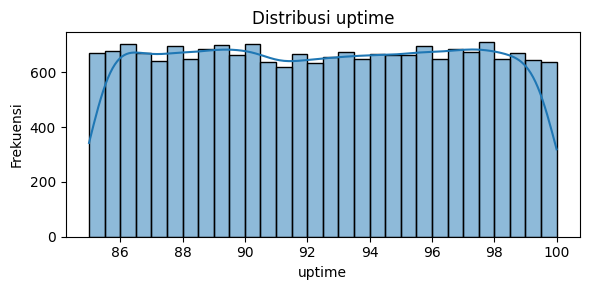

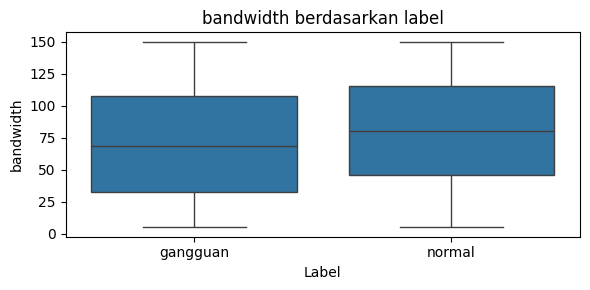

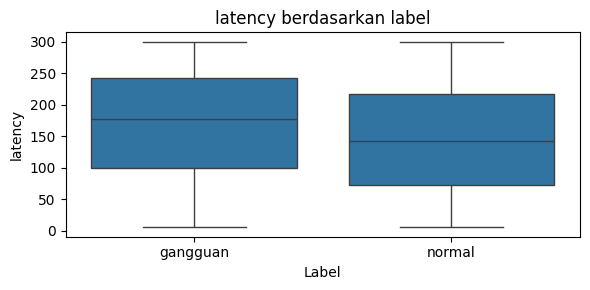

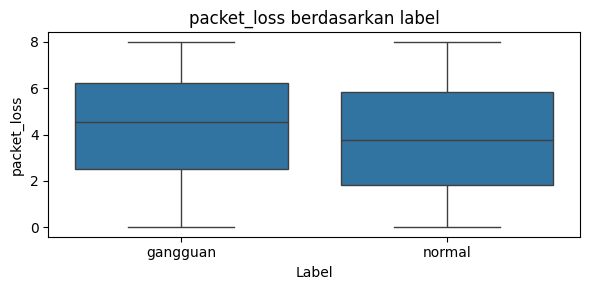

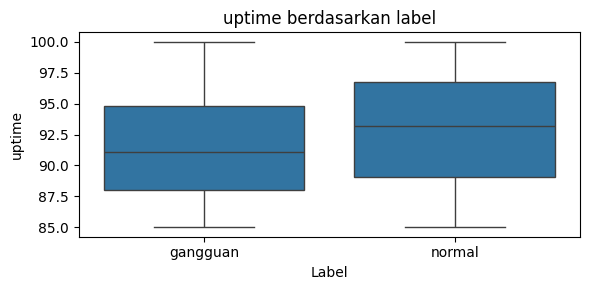

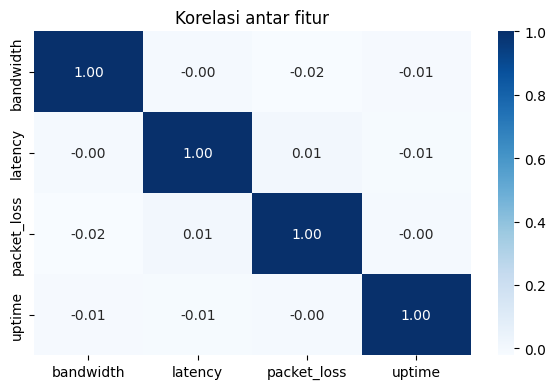

In [13]:
# Cell 4: EDA (Exploratory Data Analysis) + Visualisasi

print("Distribusi Label:")
display(df["label"].value_counts())
display(df["label"].value_counts(normalize=True).round(3))

fitur_numerik = ["bandwidth", "latency", "packet_loss", "uptime"]

print("\nRingkasan statistik:")
display(df[fitur_numerik].describe())

# Distribusi tiap fitur
for kolom in fitur_numerik:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[kolom], kde=True, bins=30)
    plt.title(f"Distribusi {kolom}")
    plt.xlabel(kolom)
    plt.ylabel("Frekuensi")
    plt.tight_layout()
    plt.show()

# Perbandingan fitur berdasarkan label
for kolom in fitur_numerik:
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, x="label", y=kolom)
    plt.title(f"{kolom} berdasarkan label")
    plt.xlabel("Label")
    plt.ylabel(kolom)
    plt.tight_layout()
    plt.show()

# Korelasi
plt.figure(figsize=(6, 4))
corr = df[fitur_numerik].corr()
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Korelasi antar fitur")
plt.tight_layout()
plt.show()


## Data Cleaning dan alur preprocessing

In [14]:
# Cell 5: Data cleaning dan preprocessing

print("Cek missing value per kolom:")
display(df.isnull().sum())

# Drop missing kalau ada
df = df.dropna().reset_index(drop=True)

print("\nSetelah drop missing:")
print("Ukuran dataset:", df.shape)

# Pastikan label hanya normal/gangguan
print("\nUnique label:", df["label"].unique())


Cek missing value per kolom:


bandwidth      0
latency        0
packet_loss    0
uptime         0
label          0
dtype: int64


Setelah drop missing:
Ukuran dataset: (20000, 5)

Unique label: ['gangguan' 'normal']


## Fitur Engineering Fitur & Target

In [15]:
# Cell 6: Feature Engineering (memilih fitur dan target)

FEATURE_NAMES = ["bandwidth", "latency", "packet_loss", "uptime"]
X = df[FEATURE_NAMES]
y = df["label"]

print("X shape:", X.shape)
print("y shape:", y.shape)
print("Kolom fitur:", FEATURE_NAMES)

  

X shape: (20000, 4)
y shape: (20000,)
Kolom fitur: ['bandwidth', 'latency', 'packet_loss', 'uptime']


## Label Encoder (Menerjemahkan Data Menjadi Angka)

In [16]:
# Cell 7: Encoding label (normal ataugangguan jadi angka)

le = LabelEncoder()
y_enc = le.fit_transform(y)

print("Kelas label encoder:", list(le.classes_))
print("Contoh hasil encoding:")
display(pd.DataFrame({"label_asli": y.head(10), "label_encode": y_enc[:10]}))


Kelas label encoder: ['gangguan', 'normal']
Contoh hasil encoding:


,label_asli,label_encode
0,gangguan,0
1,normal,1
2,gangguan,0
3,normal,1
4,normal,1
5,normal,1
6,normal,1
7,gangguan,0
8,normal,1
9,gangguan,0


## Split Data & Training

In [21]:
# Cell 8: split data train dan test

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_enc,
    test_size=0.2,
    random_state=42,
    stratify=y_enc
)

print("Data train:", X_train.shape, y_train.shape)
print("Data test :", X_test.shape, y_test.shape)



Data train: (16000, 4) (16000,)
Data test : (4000, 4) (4000,)


## Scaling Data

In [ ]:
# Cell 9: Scaling

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

print("Scaling selesai.")
print("X_train_s shape:", X_train_s.shape)
print("X_test_s shape :", X_test_s.shape)


## Implementasi Algoritma Random Forest & Naive Bayes

In [ ]:
# Cell 10: Training model (Random Forest & Naive Bayes)

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

nb = GaussianNB()

rf.fit(X_train_s, y_train)
nb.fit(X_train_s, y_train)

print("Training selesai untuk Random Forest dan Naive Bayes.")


## Evaluasi Nilai Metrik dan hasil laporan

In [ ]:
# Cell 11: Evaluasi Metrik (accuracy, precision, recall, f1, confusion matrix)

def evaluasi_model(model, X_te, y_te, nama_model):
    y_pred = model.predict(X_te)

    acc = accuracy_score(y_te, y_pred)
    prec = precision_score(y_te, y_pred, zero_division=0)
    rec = recall_score(y_te, y_pred, zero_division=0)
    f1 = f1_score(y_te, y_pred, zero_division=0)
    cm = confusion_matrix(y_te, y_pred)

    print(f"\nHasil evaluasi: {nama_model}")
    print(f"Akurasi  : {acc:.4f}")
    print(f"Presisi  : {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_te, y_pred, target_names=le.classes_))

    return {
        "accuracy": float(acc),
        "precision": float(prec),
        "recall": float(rec),
        "f1": float(f1),
        "cm": cm
    }

rf_metrics = evaluasi_model(rf, X_test_s, y_test, "Random Forest")
nb_metrics = evaluasi_model(nb, X_test_s, y_test, "Naive Bayes")




## Confusion Matrix Dari Kedua Model

In [ ]:
# Cell 12: Visualisasi Confusion Matrix

def plot_confusion_matrix(cm, nama_model):
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"Confusion Matrix - {nama_model}")
    plt.xlabel("Prediksi")
    plt.ylabel("Aktual")
    plt.tight_layout()
    plt.show()

plot_confusion_matrix(rf_metrics["cm"], "Random Forest")
plot_confusion_matrix(nb_metrics["cm"], "Naive Bayes")


## Visualisasi ROC dan PR Curve

In [ ]:
# Cell 13: Visualisasi ROC dan PR Curve

# menentukan class "gangguan" sebagai positive class
try:
    gangguan_index = int(le.transform(["gangguan"])[0])
except Exception:
    print("Label 'gangguan' tidak ditemukan, fallback dipakai kelas index 1")
    gangguan_index = 1

y_test_bin = (y_test == gangguan_index).astype(int)

rf_proba = rf.predict_proba(X_test_s)[:, gangguan_index]
nb_proba = nb.predict_proba(X_test_s)[:, gangguan_index]

# ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test_bin, rf_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_nb, tpr_nb, _ = roc_curve(y_test_bin, nb_proba)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={roc_auc_rf:.3f})")
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC={roc_auc_nb:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.title("ROC Curve Random Forest vs Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()

# PR Curve
prec_rf, rec_rf, _ = precision_recall_curve(y_test_bin, rf_proba)
pr_auc_rf = auc(rec_rf, prec_rf)

prec_nb, rec_nb, _ = precision_recall_curve(y_test_bin, nb_proba)
pr_auc_nb = auc(rec_nb, prec_nb)

plt.figure(figsize=(6, 4))
plt.plot(rec_rf, prec_rf, label=f"Random Forest (AUC={pr_auc_rf:.3f})")
plt.plot(rec_nb, prec_nb, label=f"Naive Bayes (AUC={pr_auc_nb:.3f})")
plt.title("Precision-Recall Curve RF vs NB")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.tight_layout()
plt.show()


## Fitur Importance

In [ ]:
# Cell 14: Feature Importance

from sklearn.inspection import permutation_importance

# Feature Importance RF bawaan
rf_fi = rf.feature_importances_
rf_fi_df = pd.DataFrame({"fitur": FEATURE_NAMES, "importance": rf_fi}).sort_values("importance", ascending=False)

plt.figure(figsize=(6, 3))
sns.barplot(data=rf_fi_df, x="importance", y="fitur")
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()

# Feature importance NB pakai permutation importance
perm_nb = permutation_importance(nb, X_test_s, y_test, n_repeats=10, random_state=42)
nb_fi_df = pd.DataFrame({"fitur": FEATURE_NAMES, "importance": perm_nb.importances_mean}).sort_values("importance", ascending=False)

plt.figure(figsize=(6, 3))
sns.barplot(data=nb_fi_df, x="importance", y="fitur")
plt.title("Feature Importance (Permutation) - Naive Bayes")
plt.tight_layout()
plt.show()

display(rf_fi_df)
display(nb_fi_df)


## Kesimpulan Model Terbaik

In [ ]:
# Cell 15: Kesimpulan Model Terbaik

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Kesimpulan Model Terbaik

# 1) membuat tabel perbandingan metrik utama

ringkasan = pd.DataFrame({
    "Model": ["Random Forest", "Naive Bayes"],
    "Accuracy": [rf_metrics["accuracy"], nb_metrics["accuracy"]],
    "Precision": [rf_metrics["precision"], nb_metrics["precision"]],
    "Recall": [rf_metrics["recall"], nb_metrics["recall"]],
    "F1-Score": [rf_metrics["f1"], nb_metrics["f1"]]
})

# 2) membuat bar plot perbandingan metrik utama

plt.figure(figsize=(8, 4))
ringkasan_melted = ringkasan.melt(id_vars="Model", var_name="Metric", value_name="Score")
sns.barplot(data=ringkasan_melted, x="Metric", y="Score", hue="Model")
plt.title("Perbandingan Metrik Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3) kesimpulan mengapa algoritma tertentu lebih baik dan atas dasar apa algoritma tersebut dipilih

if rf_metrics["accuracy"] > nb_metrics["accuracy"]:
    print("Random Forest memiliki akurasi lebih tinggi, sehingga lebih baik dalam memprediksi kelas kelas yang berlabel dan berfitur.")
else:
    print("Naive Bayes memiliki akurasi lebih tinggi, sehingga lebih baik dalam memprediksi kelas yang berlabel dan berfitur.")

display(ringkasan)